# Dataset - 1 Salary Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:\Om Data Science\Data Science Assignments\Assignment 4\Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Visualization

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [7]:
df.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [9]:
df.shape

(30, 2)

In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Correlation

In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\ompra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

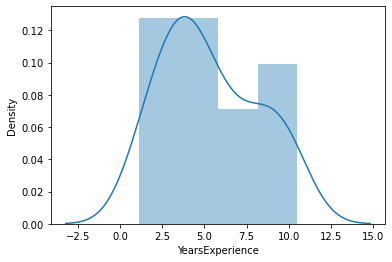

In [13]:
import seaborn as sns
sns.distplot(df['YearsExperience'])

C:\Users\ompra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

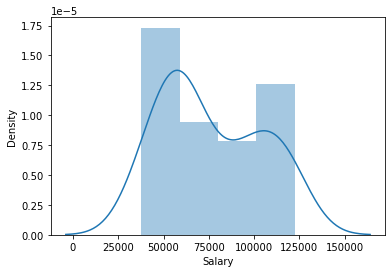

In [15]:
sns.distplot(df['Salary'])

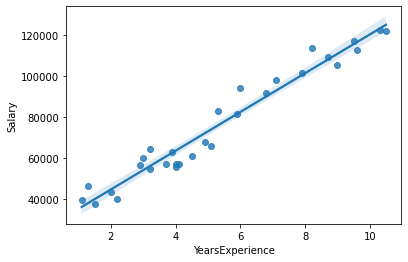

In [34]:
sns.regplot(x="YearsExperience", y="Salary", data=df);

# Fitting a Linear Regression Model

In [16]:
import statsmodels.formula.api as smf

# Model building

In [32]:
model = smf.ols("YearsExperience~Salary",data = df).fit()

# Model testing

In [35]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [36]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [37]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [38]:
newdata=pd.Series([1.1,1.3])

In [41]:
data_pred=pd.DataFrame(newdata,columns=['Salary'])

In [42]:
model.predict(data_pred)

0   -2.383049
1   -2.383029
dtype: float64

# Log Method

In [43]:
model=smf.ols("np.log(YearsExperience)~np.log(Salary)",data=df).fit()

In [44]:
model.params

Intercept        -16.490132
np.log(Salary)     1.610448
dtype: float64

In [59]:
print(model.pvalues,'\n', model.tvalues)

Intercept         1.484571e-17
np.log(Salary)    5.366684e-19
dtype: float64 
 Intercept        -19.031773
np.log(Salary)    21.595708
dtype: float64


In [46]:
(model.rsquared,model.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

# sqrt

In [49]:
model=smf.ols("np.sqrt(YearsExperience)~np.log(Salary)",data=df).fit()

In [50]:
model.params

Intercept        -16.539059
np.log(Salary)     1.678660
dtype: float64

In [51]:
model.pvalues, model.tvalues

(Intercept         1.484571e-17
 np.log(Salary)    5.366684e-19
 dtype: float64,
 Intercept        -19.031773
 np.log(Salary)    21.595708
 dtype: float64)

In [60]:
(model.rsquared,model.rsquared_adj)

(0.9433627863225935, 0.9413400286912575)

# yeojohnson mmethod

In [62]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(df['Salary']) 

In [63]:
model=smf.ols('yf_target~YearsExperience',data=df).fit()

In [64]:
model.params

Intercept          15.751205
YearsExperience     0.283321
dtype: float64

In [65]:
model.pvalues, model.tvalues

(Intercept          7.240897e-45
 YearsExperience    3.477604e-18
 dtype: float64,
 Intercept          186.364479
 YearsExperience     20.117740
 dtype: float64)

In [67]:
(model.rsquared,model.rsquared_adj)

(0.935293549568351, 0.9329826049100778)

# Dataset 2 - Delivery Time Model

In [68]:
import pandas as pd
import numpy as np

In [69]:
data=pd.read_csv('D:\Om Data Science\Data Science Assignments\Assignment 4\delivery_time.csv')

In [70]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [71]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [72]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [73]:
data.shape

(21, 2)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [87]:
dataset.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


C:\Users\ompra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

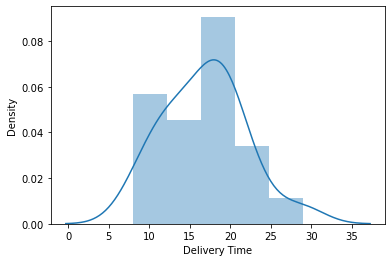

In [81]:
sns.distplot(data['Delivery Time'])

C:\Users\ompra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

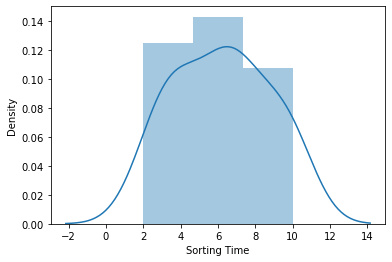

In [83]:
sns.distplot(data['Sorting Time'])

In [85]:
dataset=data.rename({'Delivery Time':'Delivery','Sorting Time':'Sorting'},axis=1)

In [86]:
dataset

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [88]:
import statsmodels.formula.api as smf

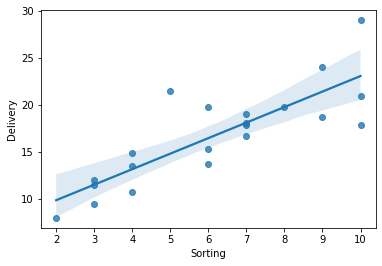

In [91]:
sns.regplot(x="Sorting", y="Delivery", data=dataset);

In [89]:
model1= smf.ols("Delivery~Sorting",data = dataset).fit()

In [92]:
model1.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [93]:
print(model1.tvalues, '\n', model1.pvalues)    

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [94]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Log Method

In [128]:
model1= smf.ols("np.log(Delivery)~np.log(Sorting)",data = dataset).fit()

In [129]:
model1.params

Intercept          1.741987
np.log(Sorting)    0.597522
dtype: float64

In [130]:
model1.pvalues , model1.tvalues

(Intercept          5.921137e-11
 np.log(Sorting)    1.601539e-07
 dtype: float64,
 Intercept          13.085552
 np.log(Sorting)     8.024484
 dtype: float64)

In [131]:
model1.rsquared , model1.rsquared_adj

(0.77216134926874, 0.7601698413355158)

# sqrt

In [132]:
model1= smf.ols("np.sqrt(Delivery)~np.sqrt(Sorting)",data = dataset).fit()

In [133]:
model1.params

Intercept           1.613479
np.sqrt(Sorting)    1.002217
dtype: float64

In [134]:
model1.pvalues , model1.tvalues

(Intercept           1.833621e-04
 np.sqrt(Sorting)    8.475706e-07
 dtype: float64,
 Intercept           4.628248
 np.sqrt(Sorting)    7.152817
 dtype: float64)

In [135]:
model1.rsquared , model1.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

# Exponential method

In [136]:
model1= smf.ols("np.exp(Delivery)~np.exp(Sorting)",data = dataset).fit()

In [137]:
model1.params

Intercept         -6.243560e+10
np.exp(Sorting)    5.779920e+07
dtype: float64

In [138]:
print(model1.pvalues ,'\n', model1.tvalues)

Intercept          0.744301
np.exp(Sorting)    0.014970
dtype: float64 
 Intercept         -0.330955
np.exp(Sorting)    2.675152
dtype: float64


In [139]:
model1.rsquared , model1.rsquared_adj

(0.27360134105224765, 0.23536983268657652)

# yeojohnson method

In [141]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(dataset['Delivery']) 

In [142]:
model=smf.ols('yf_target~Sorting',data=dataset).fit()

In [143]:
model1.params

Intercept         -6.243560e+10
np.exp(Sorting)    5.779920e+07
dtype: float64

In [145]:
model1.pvalues ,'\n', model1.tvalues

(Intercept          0.744301
 np.exp(Sorting)    0.014970
 dtype: float64,
 '\n',
 Intercept         -0.330955
 np.exp(Sorting)    2.675152
 dtype: float64)

In [146]:
model1.rsquared , model1.rsquared_adj

(0.27360134105224765, 0.23536983268657652)